___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd     
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
#import pandas_profiling
#import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

#### Load Dataset

In [2]:
df=pd.read_csv('Mall_Customers.csv')

#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df=pd.get_dummies(data=df, drop_first=True)

In [6]:
df.columns = ['CustomerID', 'age','income','score', 'male']

In [7]:
df.drop('CustomerID', axis=1, inplace=True)

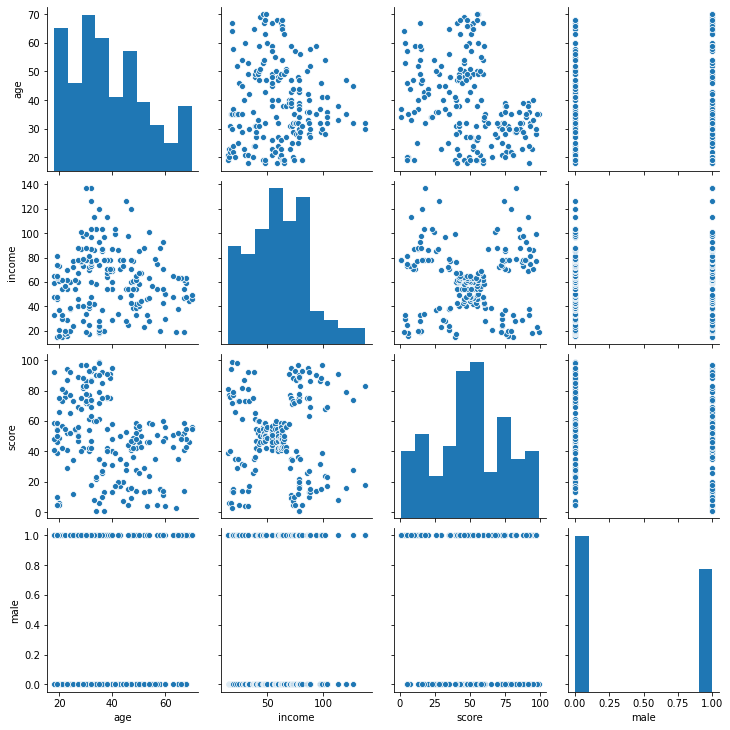

In [8]:
sns.pairplot(df);

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [9]:
from pyclustertend import hopkins
hopkins(df, df.shape[0])

0.3164009476015469

In [10]:
df2=df[['age', 'score']]

#### *ii. Determine optimal number of clusters*

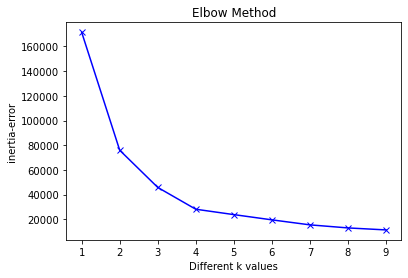

In [11]:
ssd = []
 
K = range(1,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df2)
    ssd.append(model.inertia_)
    
plt.plot(K, ssd, "bx-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method");

#### *iii. Apply K Means*

In [12]:
model3=KMeans(n_clusters = 3)
model3.fit(df2)

KMeans(n_clusters=3)

In [13]:
model2=KMeans(n_clusters = 2)
model2.fit(df2)

KMeans(n_clusters=2)

#### *iv. Visualizing and Labeling All the Clusters*

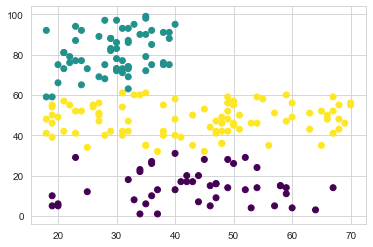

In [14]:
sns.set_style("whitegrid")
plt.scatter(df2.iloc[:,0], df2.iloc[:,1], c=model3.labels_, cmap="viridis");

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [15]:
df3=df[['income', 'score']]

#### *ii. Determine optimal number of clusters*

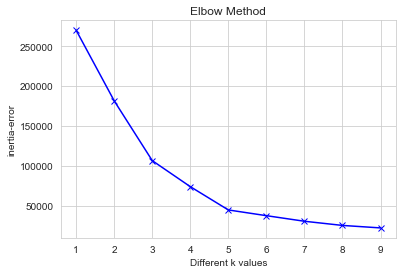

In [16]:
ssd = []
 
K = range(1,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df3)
    ssd.append(model.inertia_)
    
plt.plot(K, ssd, "bx-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method");

#### *iii. Apply K Means*

In [17]:
model_5=KMeans(n_clusters = 5)
model_5.fit(df3)

KMeans(n_clusters=5)

#### *iv. Visualizing and Labeling All the Clusters*

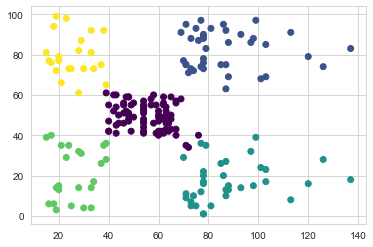

In [18]:
plt.scatter(df3.iloc[:,0], df3.iloc[:,1], c=model_5.labels_, cmap="viridis");

### Clustering based on Gender and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [19]:
df4=df[['male', 'score']]

#### *ii. Determine optimal number of clusters*

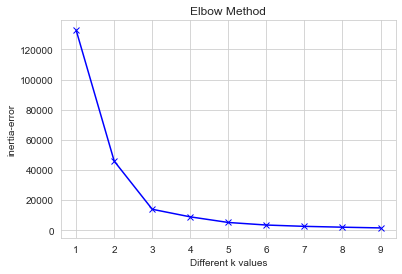

In [20]:
ssd = []
 
K = range(1,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df4)
    ssd.append(model.inertia_)
    
plt.plot(K, ssd, "bx-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method");

#### *iii. Apply K Means*

In [21]:
model_gender=KMeans(n_clusters = 3)
model_gender.fit(df4)

KMeans(n_clusters=3)

#### *iv. Visualizing and Labeling All the Clusters*

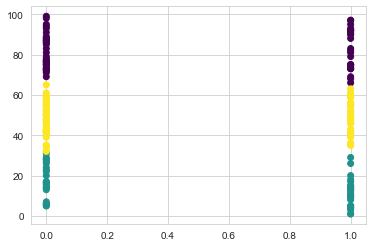

In [22]:
plt.scatter(df4.iloc[:,0], df4.iloc[:,1], c=model_gender.labels_, cmap="viridis");

### Clustering based on Income, Age and Spending Score

In [23]:
df5=df[['income', 'age', 'score']]

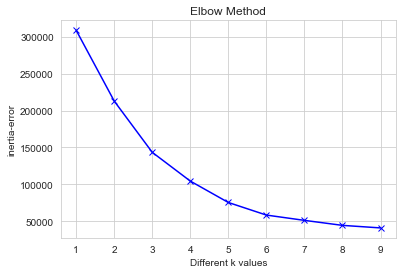

In [24]:
ssd = []
 
K = range(1,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df5)
    ssd.append(model.inertia_)
    
plt.plot(K, ssd, "bx-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method");

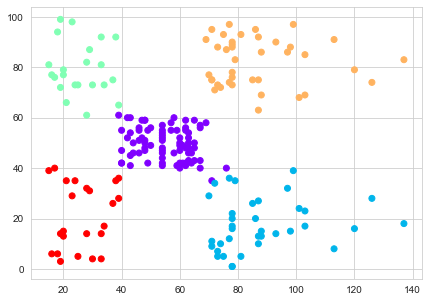

In [32]:
model_in_age=KMeans(n_clusters = 5)
model_in_age.fit(df5)
plt.scatter(df5.iloc[:,0], df5.iloc[:,2], c=model_in_age.labels_, cmap="rainbow");

### Hierarchical Clustering

#### *i. Determine optimal number of clusters using Dendogram*

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
hc_complete = linkage(df, "complete")
hc_ward = linkage(df, "ward")

plt.figure(figsize = (15,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distances")
dendrogram(hc_ward, leaf_font_size = 7);

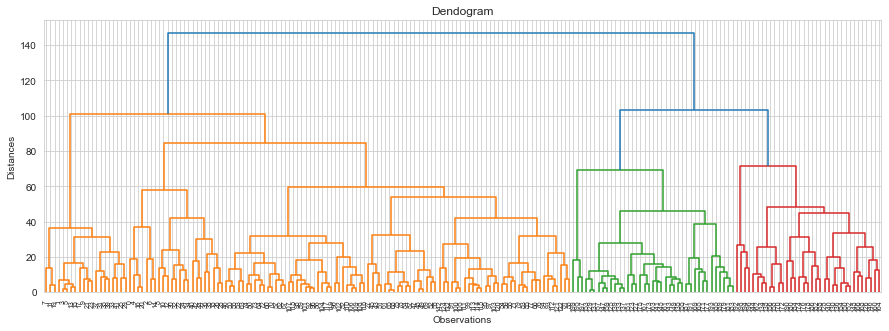

In [27]:
plt.figure(figsize = (15,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distances")
dendrogram(hc_complete, leaf_font_size = 7);

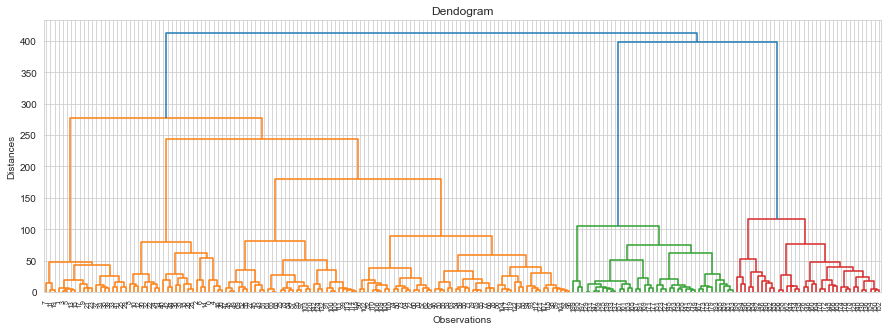

In [28]:
plt.figure(figsize = (15,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distances")
dendrogram(hc_ward, leaf_font_size = 7);

#### ii. *Apply Agglomerative Clustering*

In [29]:
from sklearn.cluster import AgglomerativeClustering
model_agg = AgglomerativeClustering(n_clusters =5, linkage="ward")
model_agg.fit_predict(df)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

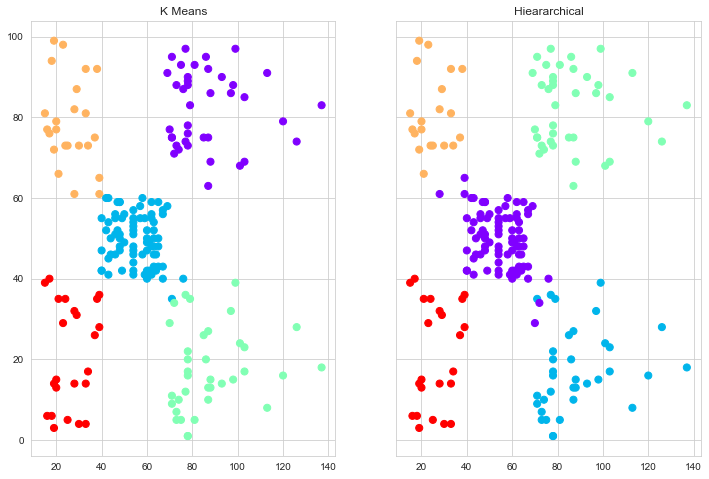

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,8))
ax1.set_title('K Means')
ax1.scatter(df5.iloc[:,0], df5.iloc[:,2], c = model_in_age.labels_, s = 50, cmap = "rainbow")
ax2.set_title("Hieararchical")
ax2.scatter(df5.iloc[:,0], df5.iloc[:,2], c = model_agg.labels_, s = 50, cmap = "rainbow");

#### iii. *Visualizing and Labeling All the Clusters* 

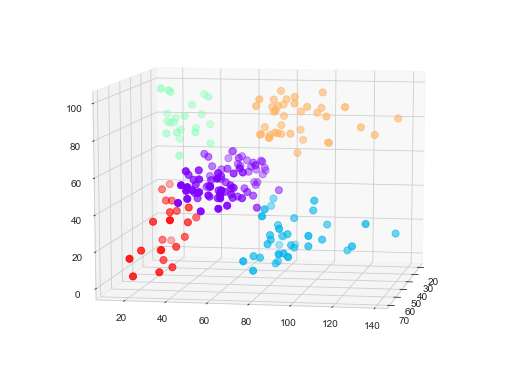

In [35]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df5.iloc[:,1],df5.iloc[:,0],df5.iloc[:,2],c=model_in_age.labels_,s = 50, cmap = "rainbow")
#ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="*",s = 1000);
#for angle in range(0, 360):
ax.view_init(10, 10);

### Conclusion

##### In the above graph I used df5 data frame which includes age, income and spending score features. 
5 clusters are seen on the graph.     
1st group(Red)      :Low income, low spending score  
2nd group(Green)   :Low income, high spending score   
3rd group(Purple)     :Moderate income, moderate spending score    
4th group(Blue)    :High income, low spending score   
5th group(Orange)   :High income, high spending score   

The blue group (4th group) has high income and low spending score. That means they can be encouraged to spend more. As a result they are the potential target customers of this dataset. They should be the target of any kind of campaign to increase their spending scores.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___